In [3]:
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/udacity/1_notmnist.ipynb



# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
import sklearn
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [4]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 1% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  if force or not os.path.exists(filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    raise Exception(
      'Failed to verify ' + filename + '. Can you get to it with a browser?')
  return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Attempting to download: notMNIST_large.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified notMNIST_large.tar.gz
Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified notMNIST_small.tar.gz


In [5]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

Extracting data for notMNIST_large. This may take a while. Please wait.
['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
Extracting data for notMNIST_small. This may take a while. Please wait.
['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']


/Users/dc/TestCode/TestUdacityDN/notMNIST_large/A
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/B
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/C
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/D
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/E
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/F
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/G
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/H
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/I
/Users/dc/TestCode/TestUdacityDN/notMNIST_large/J
['/Users/dc/TestCode/TestUdacityDN/notMNIST_large/A/U3RlbmNpbFNhbnNDb25kZW5zZWQgUmVndWxhci50dGY=.png', '/Users/dc/TestCode/TestUdacityDN/notMNIST_large/B/S2VwbGVyU3RkLUJsYWNrSXRDYXB0Lm90Zg==.png', '/Users/dc/TestCode/TestUdacityDN/notMNIST_large/C/QVRQYWNlbGxhLU1lZGl1bS5vdGY=.png', '/Users/dc/TestCode/TestUdacityDN/notMNIST_large/D/TWFnbm9saWFNVkIub3Rm.png', '/Users/dc/TestCode/TestUdacityDN/notMNIST_large/E/U2lnbiBQYWludGVycyBHb3RoaWMgTm8uIDIgSkwudHRm.png', '/Users/dc/TestCode/TestUdacityDN/not

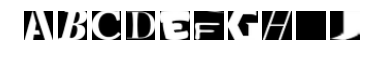

In [14]:
from IPython.display import Image,display
import os
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

#Image(filename='test.png') 
prefix_large = os.getcwd() + "/notMNIST_large"
prefix_small = os.getcwd() + "/notMNIST_small"
display_atoj=[]

for x in os.listdir(prefix_large):
    path = prefix_large + "/"+x
    print path
    samples = os.listdir(path)
    display_atoj.append(path+'/'+random.choice(samples))
    
print display_atoj

fig=figure();
num_files = len(display_atoj)
for i in range(num_files):
    fig.add_subplot(1,num_files,i+1)
    image = imread(display_atoj[i])
    imshow(image,cmap='Greys_r')
    axis('off')

plt.show()
#image_a = Image(filename='/Users/dc/TestCode/TestUdacityDN/notMNIST_large/A/QWxleHVzcyBIZWF2eSBIb2xsb3cgV2lkZS50dGY=.png')
#image_b=Image(filename='/Users/dc/TestCode/TestUdacityDN/notMNIST_large/B/TGlnaHQgJiBCbGFjay50dGY=.png')
#image_c=Image(filename='/Users/dc/TestCode/TestUdacityDN/notMNIST_large/C/QWxwaGEgU2VudHJ5LnR0Zg==.png')
#display(image_a,image_b,image_c)


In [1]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names